      sex   age  sibsp  parch     fare embarked  class    who  alone  survived
0    male  22.0      1      0   7.2500        S  Third    man  False         0
1  female  38.0      1      0  71.2833        C  First  woman  False         1
2  female  26.0      0      0   7.9250        S  Third  woman   True         1
3  female  35.0      1      0  53.1000        S  First  woman  False         1
4    male  35.0      0      0   8.0500        S  Third    man   True         0
              age       sibsp       parch        fare    survived
count  714.000000  891.000000  891.000000  891.000000  891.000000
mean    29.699118    0.523008    0.381594   32.204208    0.383838
std     14.526497    1.102743    0.806057   49.693429    0.486592
min      0.420000    0.000000    0.000000    0.000000    0.000000
25%     20.125000    0.000000    0.000000    7.910400    0.000000
50%     28.000000    0.000000    0.000000   14.454200    0.000000
75%     38.000000    1.000000    0.000000   31.000000    1.00000

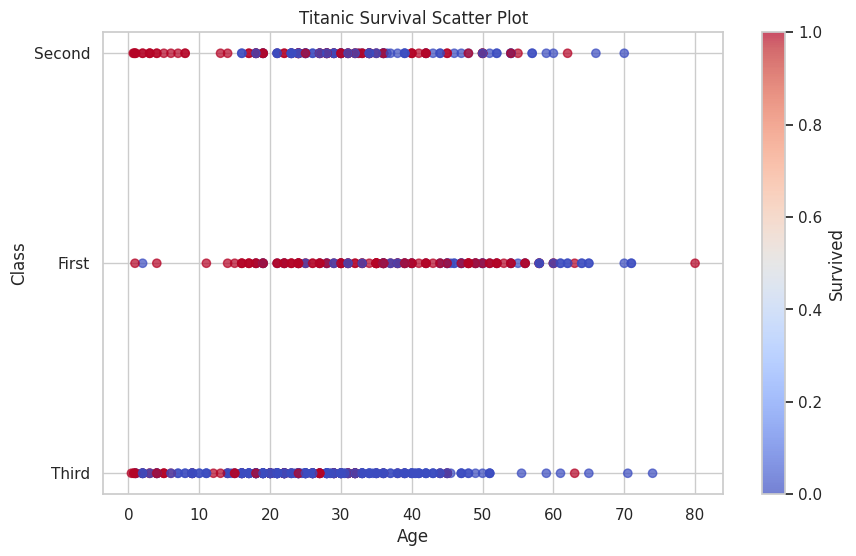

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("Titanic.csv")
print(df.head())
print(df.describe())
print(df.info)
print(df.columns)
#We can see that sex and who are pretty much the same information
df = df.drop(['who'], axis=1)
def maps_for_dataset(df):
    map_for_sex = {'male':0, 'female':1}
    df['sex']=df['sex'].map(map_for_sex)
    map_for_class = {'First':1,'Third':3, 'Second':2 }
    df['class'] = df['class'].map(map_for_class)
    map_for_alone = {True:1, False:0}
    df['alone'] = df['alone'].map(map_for_alone)
    map_for_embarked = {'S':1, 'C':2, 'Q':3}
    df['embarked'] = df['embarked'].map(map_for_embarked)
    return df

#df = maps_for_dataset(df)
df = df.dropna()
# Get a list of categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Create dummy variables for each categorical column
df_with_dummies = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Display the first few rows of the new dataset with dummy variables
print(df_with_dummies.head())

def create_survival_scatter_plot(df):
    # Create a scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(df['age'], df['class'], c=df['survived'], cmap='coolwarm', alpha=0.7)

    # Customize the plot
    plt.title('Titanic Survival Scatter Plot')
    plt.xlabel('Age')
    plt.ylabel('Class')
    plt.colorbar(label='Survived')

    # Show the plot
    plt.show()
create_survival_scatter_plot(df)

From the above plot we can safely tell that the first class was safer since more red points are presented at 1 and at the opposite we understand that class 3 was the one with the least survivors.Also we see that children tend to have a higher percentage of survival since all parents protect their and also as the age is increasing the percentage of surviving is decreasing, somethinf which is normal if we grasp the lower physical abilities of the elderly.


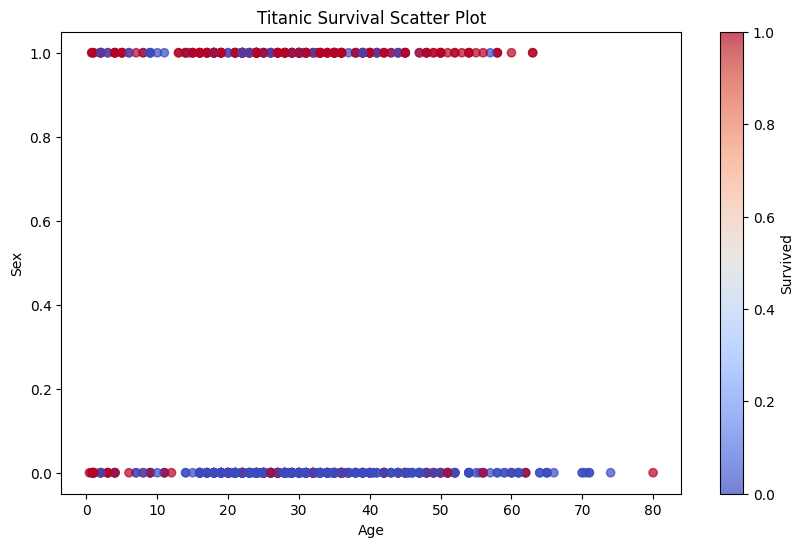

In [ ]:
    # Create a scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(df['age'], df['sex'], c=df['survived'], cmap='coolwarm', alpha=0.7)

    # Customize the plot
    plt.title('Titanic Survival Scatter Plot')
    plt.xlabel('Age')
    plt.ylabel('Sex')
    plt.colorbar(label='Survived')

    # Show the plot
    plt.show()

From the diagram above we can understand that women have a higher percentage of surviving.


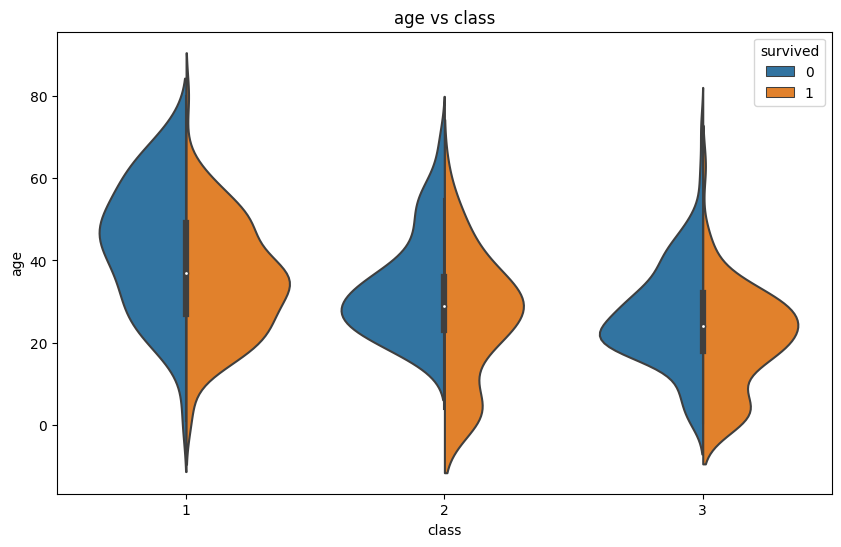

In [ ]:
def create_violin_plot(data, x_col, y_col):
    plt.figure(figsize=(10, 6))
    sns.violinplot(x=x_col, y=y_col, data=data, hue='survived', split=True)
    plt.title(f'{y_col} vs {x_col}')
    plt.show()

# Example usage
create_violin_plot(df, 'class', 'age')






Now another question arouses: Is it better to be alone or having a familiy? Well, a more intuitive answer is that when you have family you should protect them thus the percentage of surviving is lower, which scenario can easily be proved by the following plot:

Afterwards, we can analyze how the price of the ticket can affect the survival of the passenger.


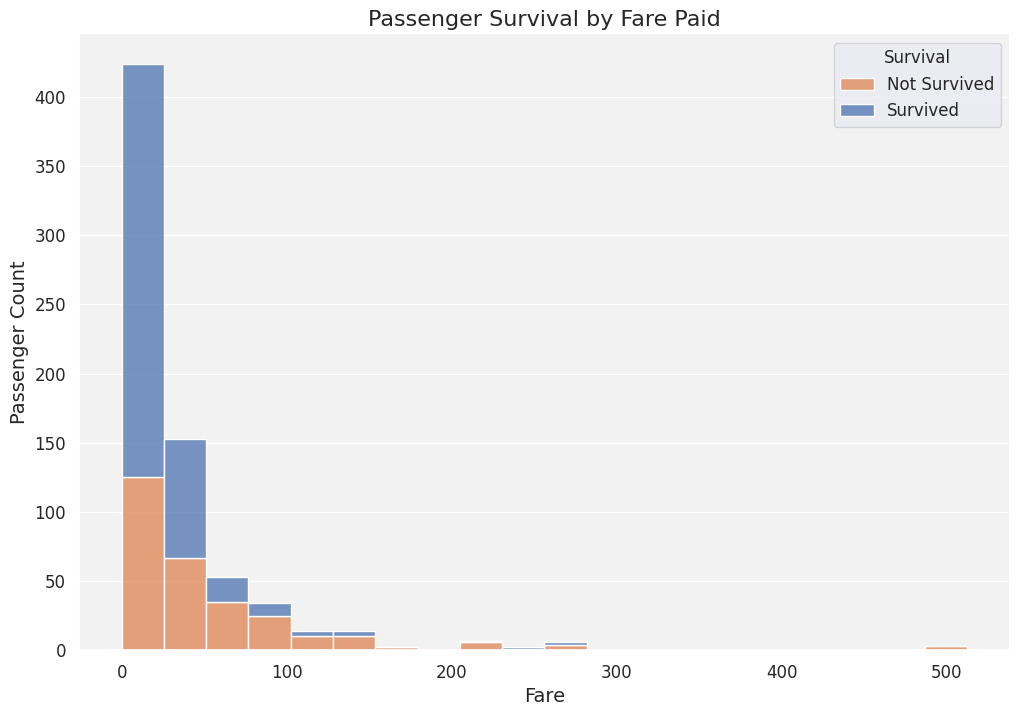

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def create_beautiful_fare_survival_plot(data):
    plt.figure(figsize=(12, 8))

    # Set the style using Seaborn's 'darkgrid'
    sns.set(style='darkgrid')

    # Create the histogram plot
    g = sns.histplot(data=data, x='fare', hue='survived', multiple='stack', bins=20)

    # Customize plot aesthetics
    plt.title('Passenger Survival by Fare Paid', fontsize=16)
    plt.xlabel('Fare', fontsize=14)
    plt.ylabel('Passenger Count', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    # Customize legend labels
    legend_labels = ['Not Survived', 'Survived']
    g.legend(title='Survival', labels=legend_labels, loc='upper right', fontsize=12)

    # Adding grid lines only to the y-axis
    g.xaxis.grid(False)
    g.yaxis.grid(True)

    # Adding a background color to the plot
    plt.gca().set_facecolor('#f2f2f2')

    # Remove the right and top spines
    sns.despine(right=True, top=True)

    plt.show()

# Example usage
create_beautiful_fare_survival_plot(df)


Lastly, we are going to plot the correlation between the attributes of passengers and graps which we should choose for our model.


<ipython-input-12-d7b1b3515295>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()['survived'].abs()


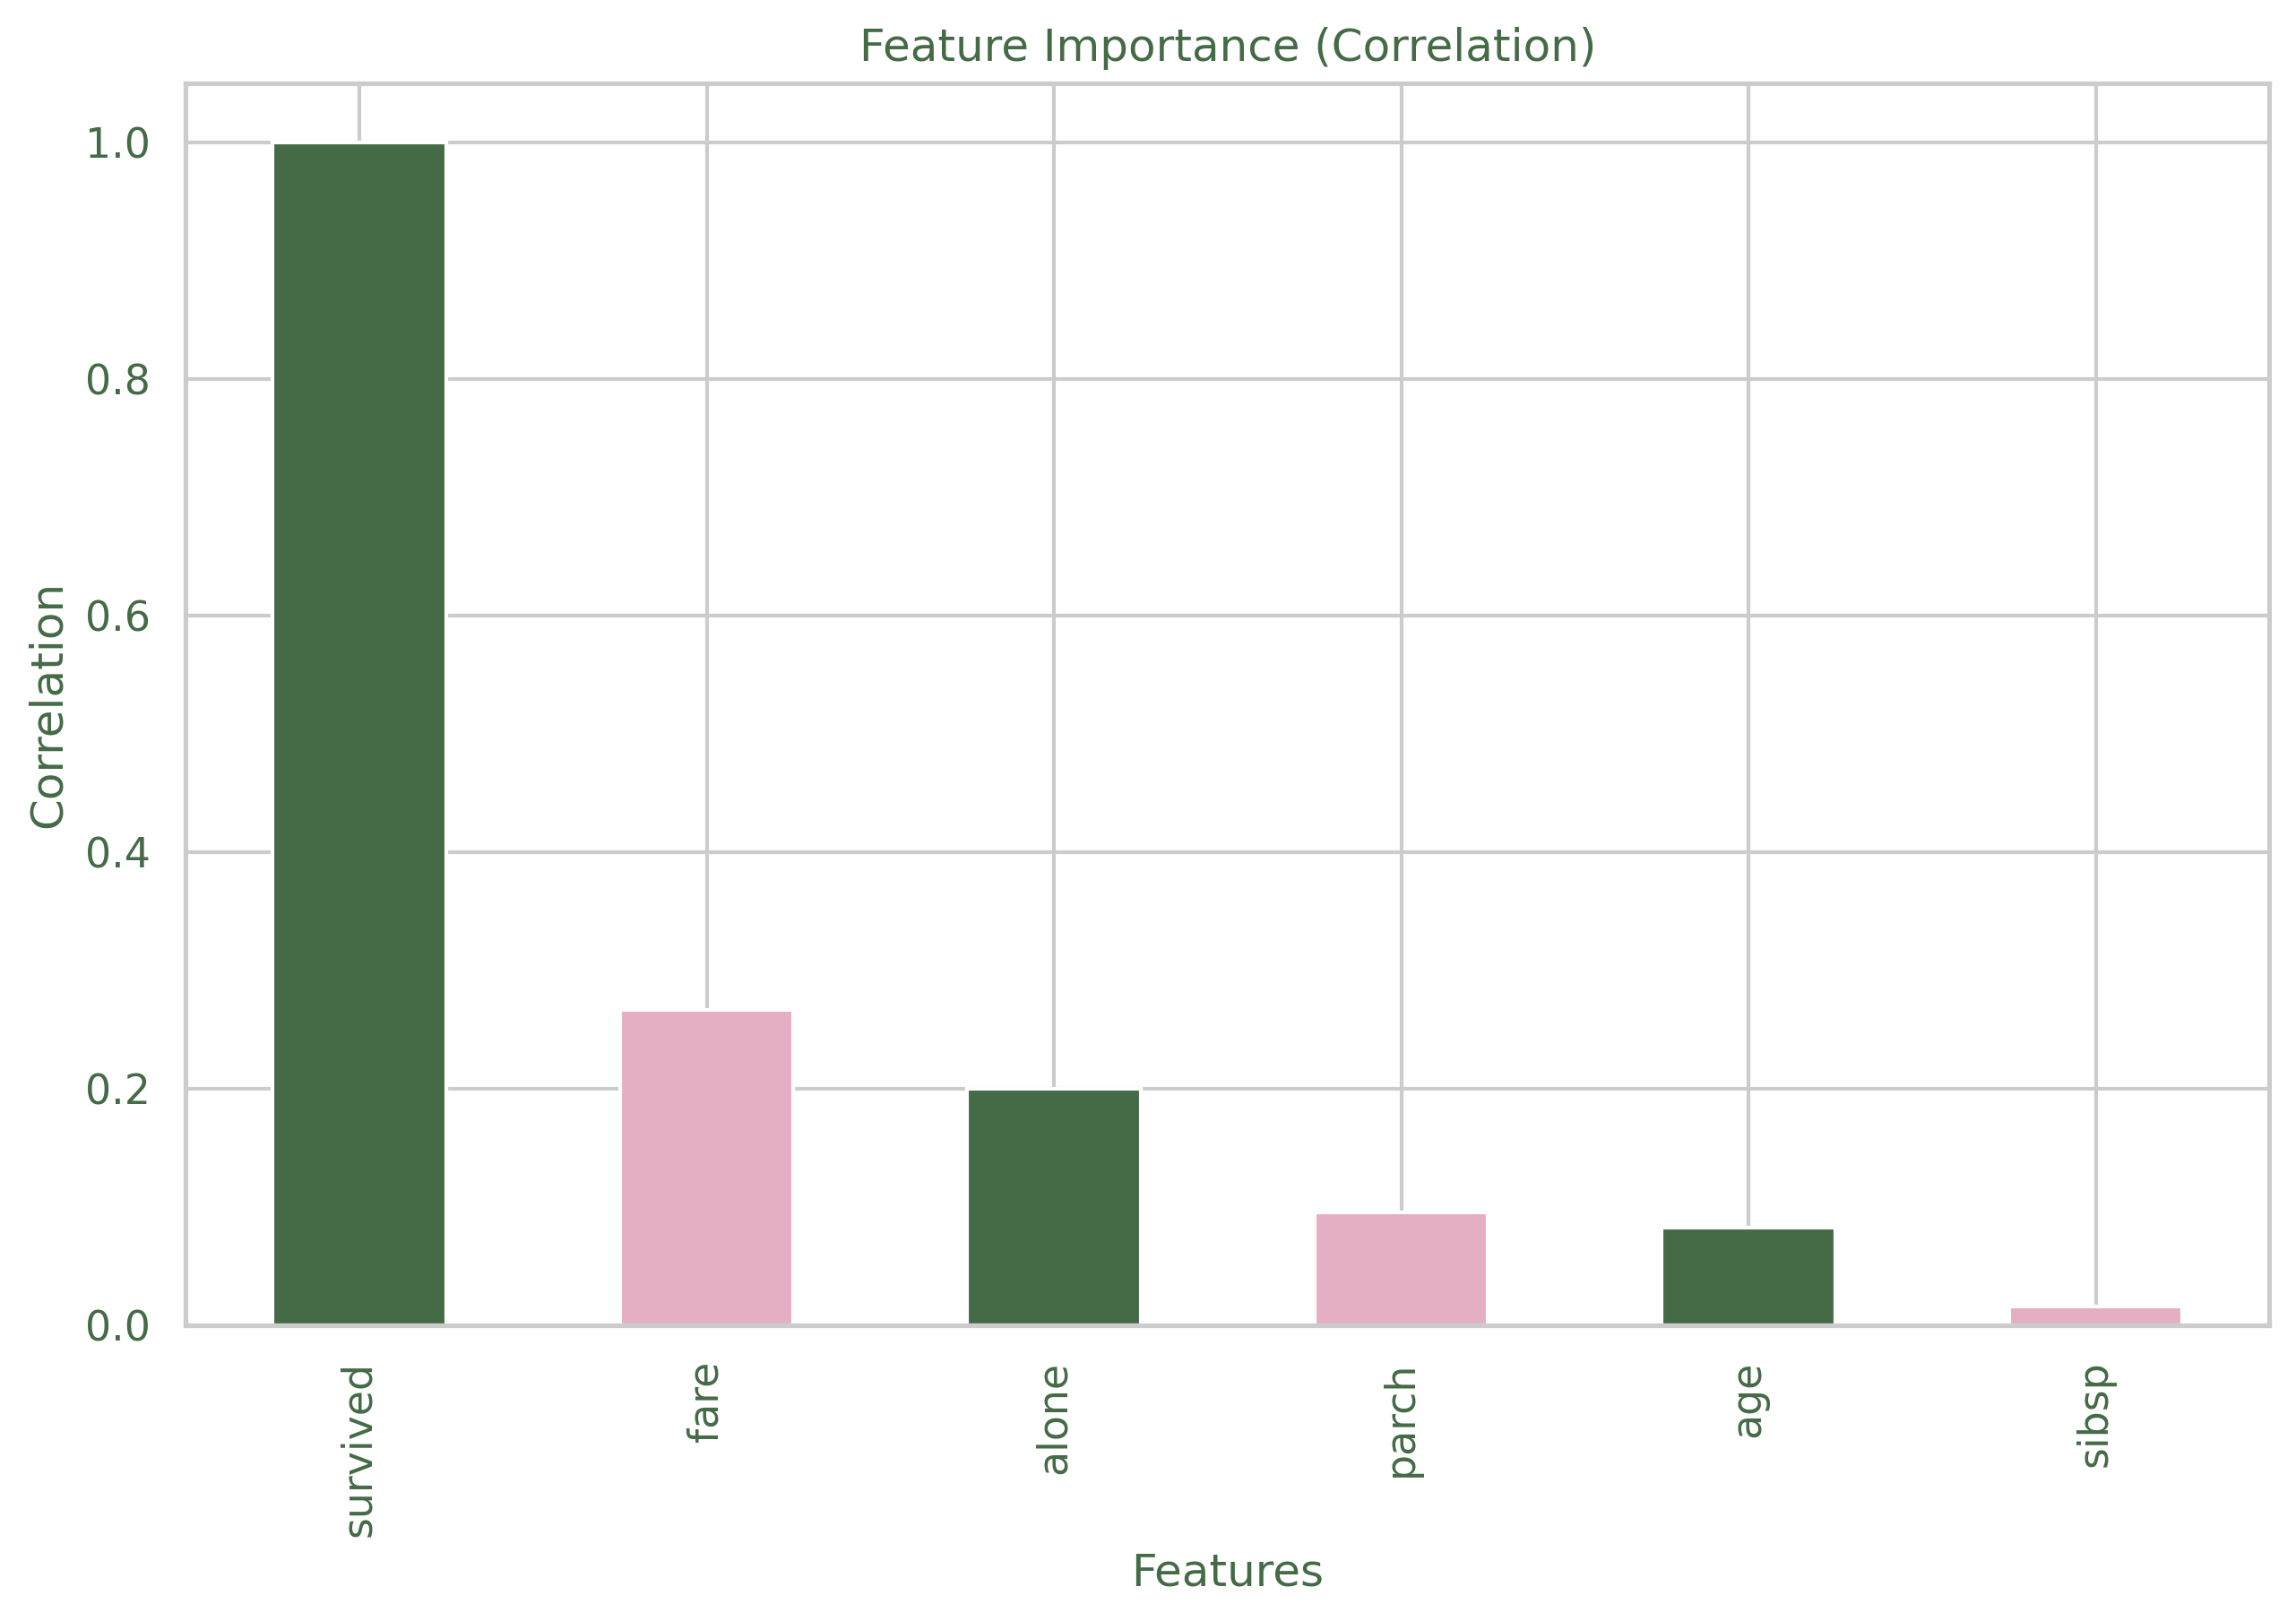

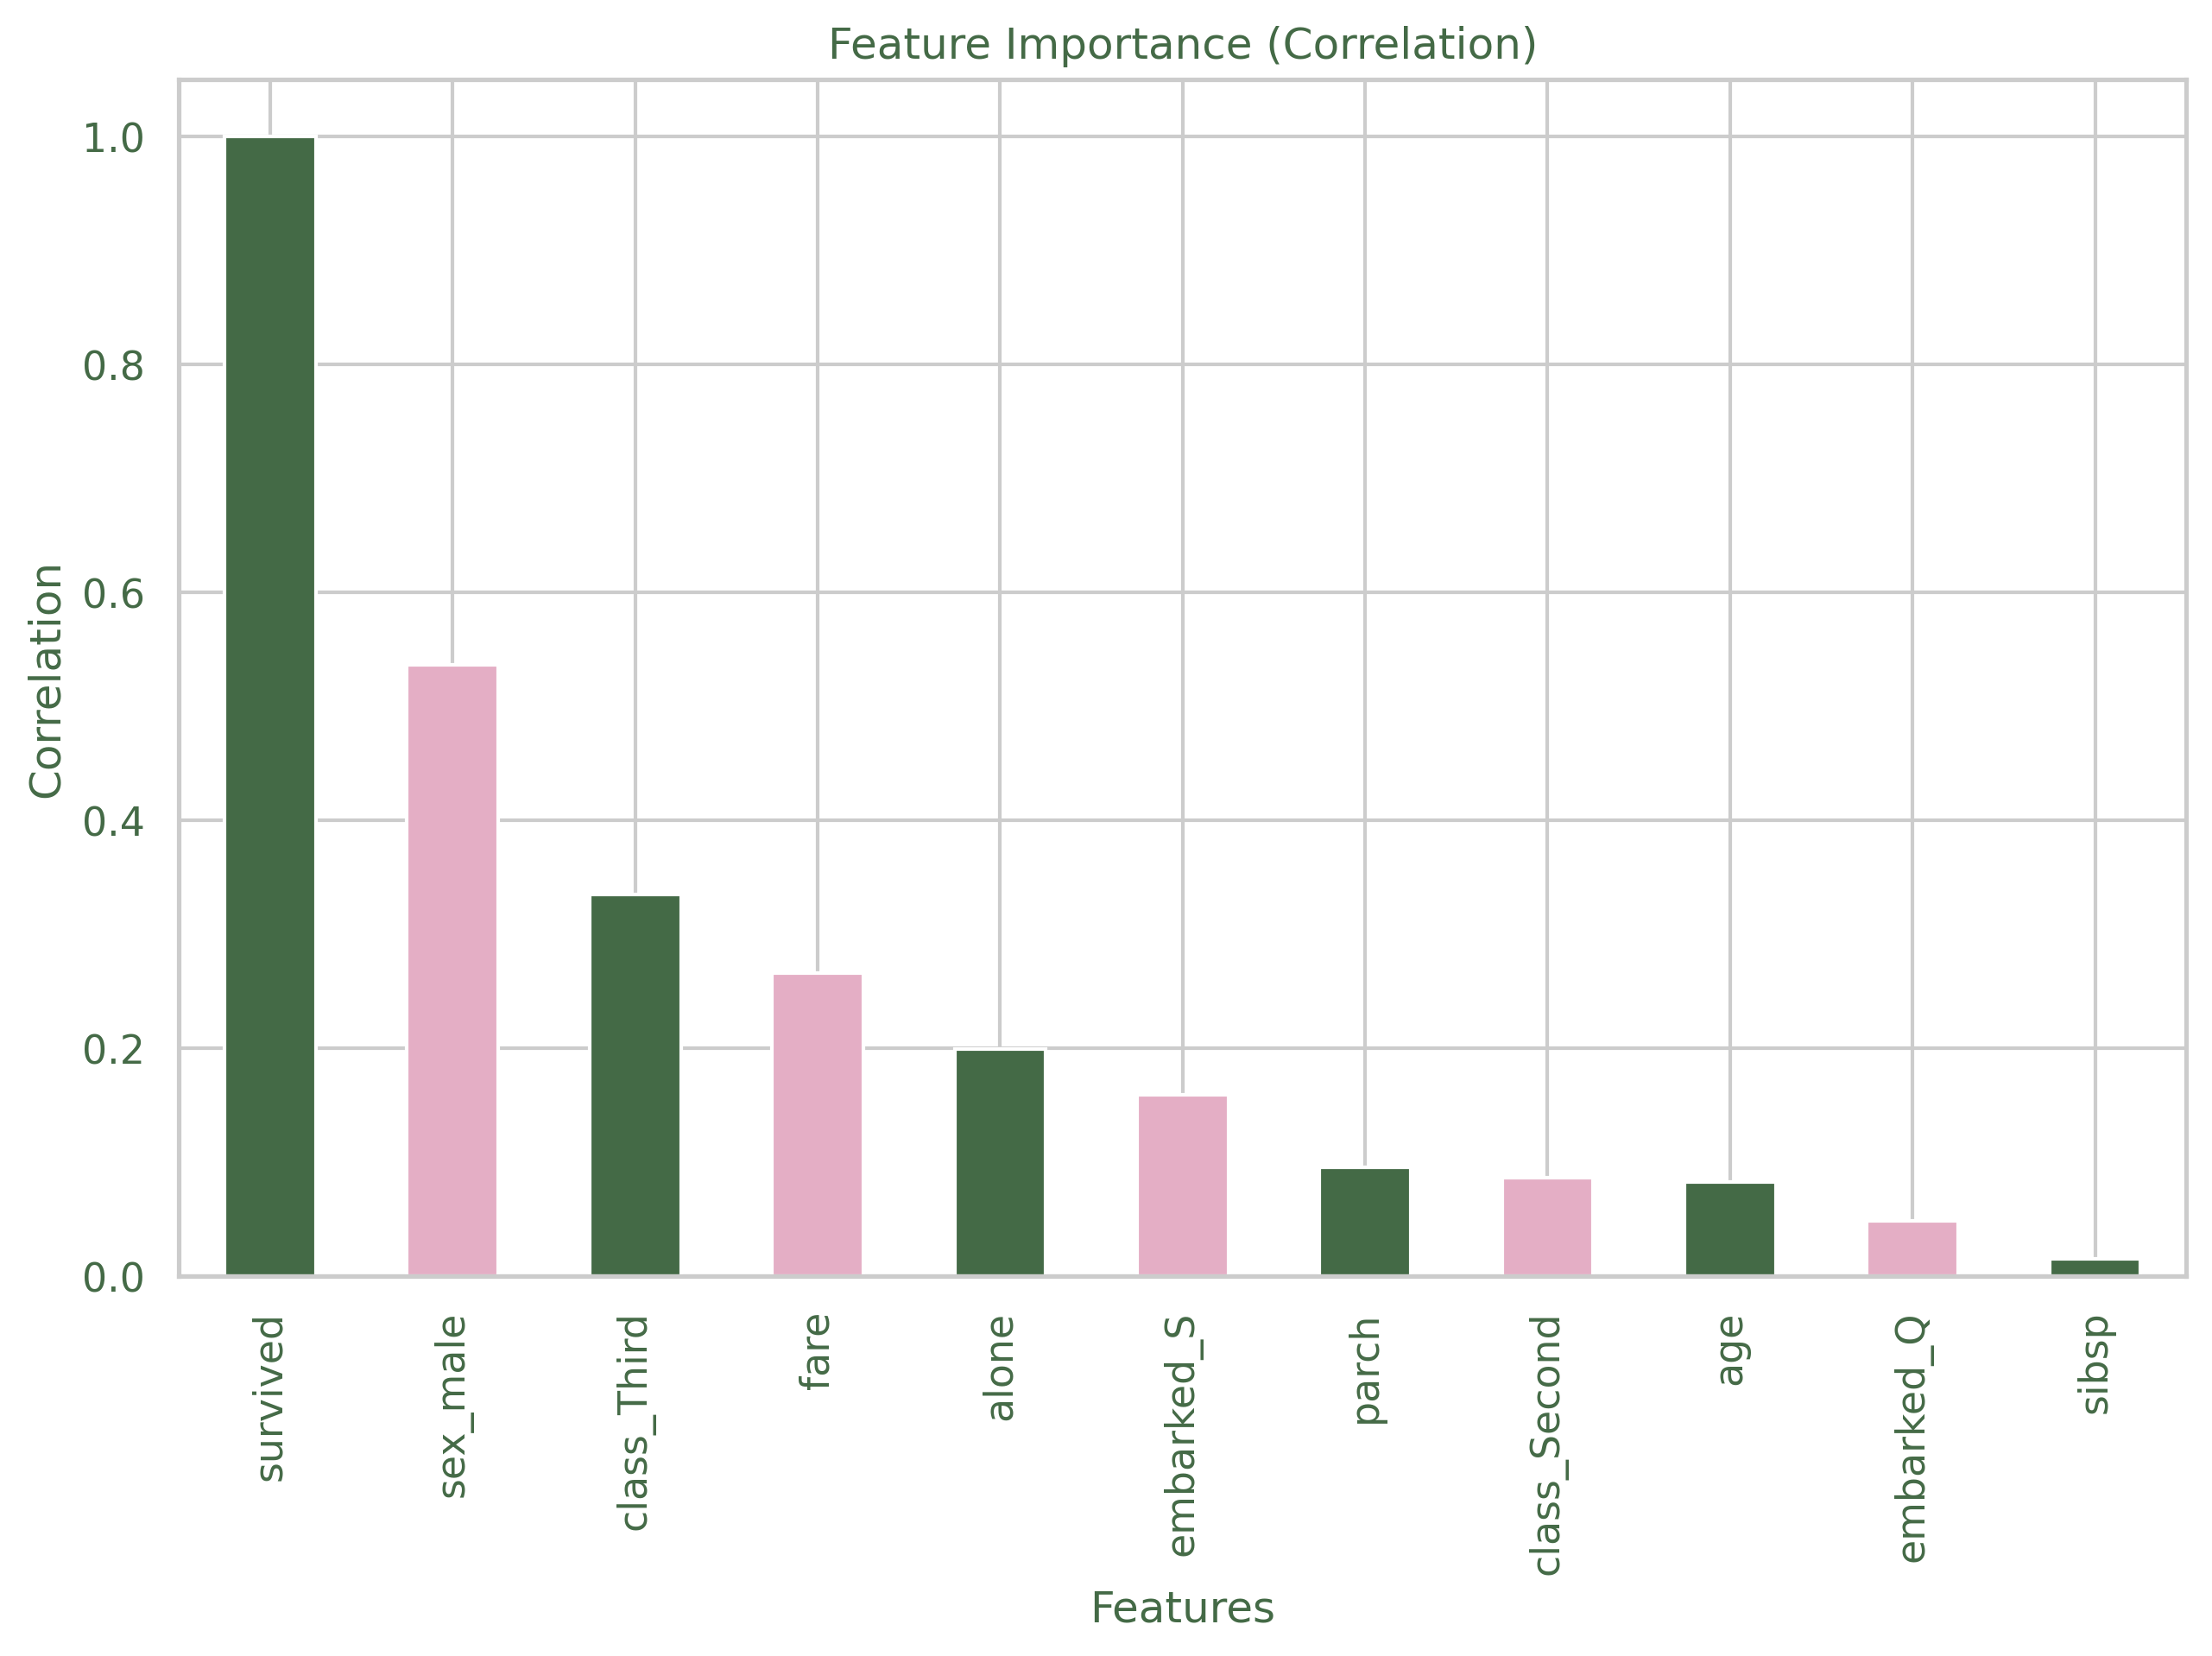

In [ ]:
def feature_correlation(df):
    correlation = df.corr()['survived'].abs()
    correlation_sorted = correlation.sort_values(ascending=False)

    plt.figure(figsize=(10, 6), dpi=300)

    bar_colors = ['#446A46', '#E4AEC5']

    correlation_sorted.plot(kind='bar', color=bar_colors)
    plt.title('Feature Importance (Correlation)', color='#446A46')
    plt.xlabel('Features', color='#446A46')
    plt.ylabel('Correlation', color='#446A46')
    plt.xticks(color='#446A46')
    plt.yticks(color='#446A46')
    plt.show()
feature_correlation(df)
feature_correlation(df_with_dummies)

For a better insight of the data we can also plot their density!

In [ ]:
def density_plotting(df):
    # Set the style of the plots (optional)
    sns.set(style="whitegrid")

    # Get the list of column names
    column_names = df.columns

    # Calculate the number of rows and columns for the subplot grid
    num_cols = 3  # Number of columns in the subplot grid
    num_rows = (len(column_names) + num_cols - 1) // num_cols

    # Create density plots for each column using subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))  # Adjust the figure size as needed

    for i, column in enumerate(column_names):
        row = i // num_cols
        col = i % num_cols
        ax = axes[row, col]

        sns.kdeplot(df[column], shade=True, ax=ax)
        ax.set_title(f'Density Plot of {column}')
        ax.set_xlabel(column)
        ax.set_ylabel('Density')

    # Remove any empty subplots
    if i < (num_rows * num_cols) - 1:
        for j in range(i + 1, num_rows * num_cols):
            fig.delaxes(axes.ravel()[j])

    plt.tight_layout()
    plt.show()

<ipython-input-7-8229d41eef97>:20: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True, ax=ax)
<ipython-input-7-8229d41eef97>:20: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True, ax=ax)
<ipython-input-7-8229d41eef97>:20: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True, ax=ax)
<ipython-input-7-8229d41eef97>:20: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True, ax=ax)
<ipython-input-7-8229d41eef97>:20: FutureWarning: 

`sha

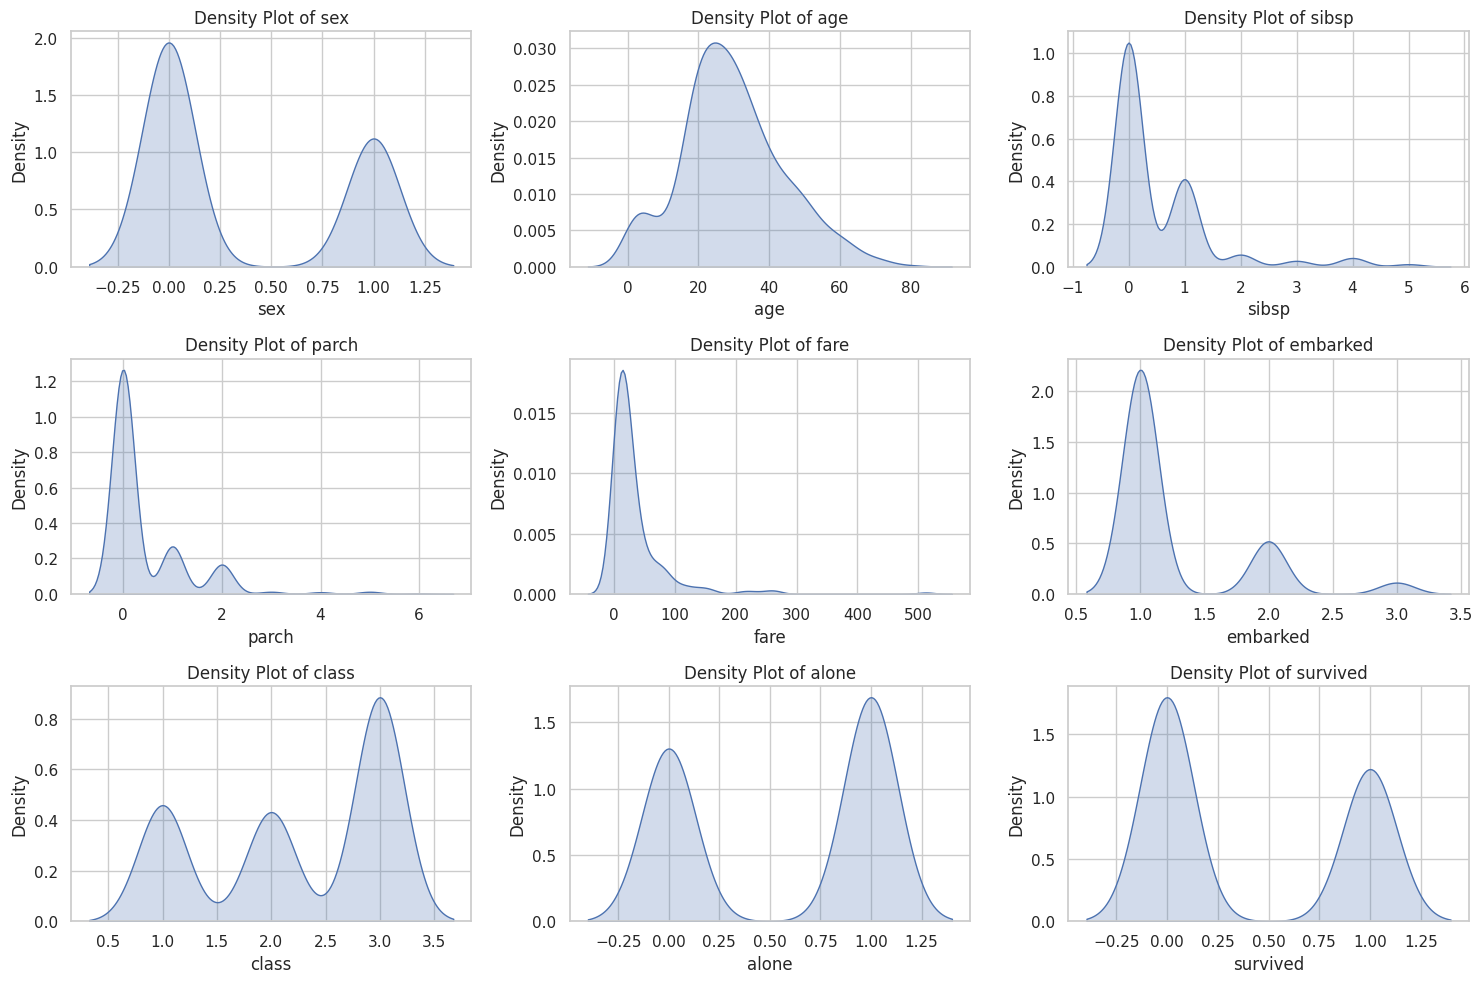

In [ ]:
density_plotting(df)

Since we plot discrete aspects of passengers identities we have pretty clear plots.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the Titanic dataset
df = df.dropna()
data = df
# Define features (X) and target (y)
cols_to_drop = ['parch', 'alone', 'embarked', 'age','sibsp']
X = data.drop(['survived']+cols_to_drop, axis=1)
y = data['survived']


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the training data, and transform the test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a list of classifiers
classifiers = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('Support Vector Machine', SVC()),
    ('K-Nearest Neighbors', KNeighborsClassifier())
]

# Train and evaluate each classifier
for name, clf in classifiers:
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name} Accuracy:', accuracy)


Logistic Regression Accuracy: 0.7482517482517482
Decision Tree Accuracy: 0.7622377622377622
Random Forest Accuracy: 0.7622377622377622
Gradient Boosting Accuracy: 0.7762237762237763
Support Vector Machine Accuracy: 0.7622377622377622
K-Nearest Neighbors Accuracy: 0.7342657342657343
